In [16]:
# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import GridSearchCV


import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN 
from sklearn.cluster import MeanShift, estimate_bandwidth
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
import os
import warnings
warnings.filterwarnings('ignore')

## chargement du dataset

In [17]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,ClientID,Genre,Age,salaire,fidelite_1_100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
dataset.isna().sum()

ClientID          0
Genre             0
Age               0
salaire           0
fidelite_1_100    0
dtype: int64

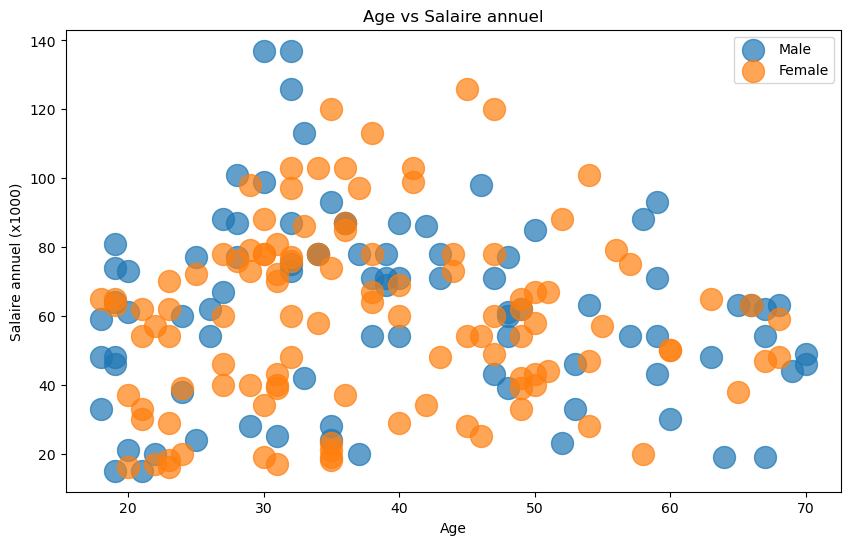

In [19]:
plt.figure(1 , figsize = (10 , 6))
for genre in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'salaire' , data = dataset[dataset['Genre'] == genre] ,
                s = 250 , alpha = 0.7 , label = genre)
plt.xlabel('Age'), plt.ylabel('Salaire annuel (x1000)') 
plt.title('Age vs Salaire annuel')
plt.legend()
plt.show()

In [20]:
px.scatter(data_frame = dataset, x = 'salaire', y = 'fidelite_1_100',
          title = 'Salaire annuel (x1000) - fidelite_1_100', )

In [21]:
fig = px.pie(dataset, names='Genre')
fig.show()

In [22]:
# plt.figure(figsize = (14, 9))
# plotnumber = 1

# for col in ['Age', 'salaire', 'fidelite_1_100']:
#     if plotnumber <= 3:
#         ax = plt.subplot(1, 3, plotnumber)
#         sns.distplot(dataset[col])
        
#     plotnumber += 1
    
# plt.tight_layout()
# plt.show()

# K-MEANS

###  Determination de K par la methode Elbow

Text(0, 0.5, 'Inertia')

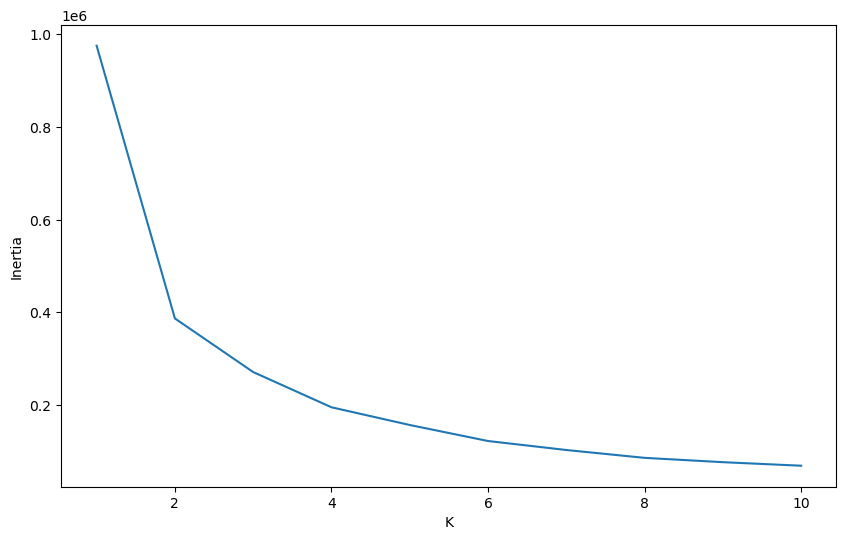

In [23]:
X = dataset.drop('Genre', axis=1)
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_xlabel('K')
ax.set_ylabel('Inertia')

In [24]:
k = 5
clusters = KMeans(n_clusters = k)
clusters.fit(X)
y_clusters = clusters.fit_predict(X)   

In [25]:
dataset.head()

,ClientID,Genre,Age,salaire,fidelite_1_100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
X['Labels'] = clusters.labels_

In [27]:
# X.head()

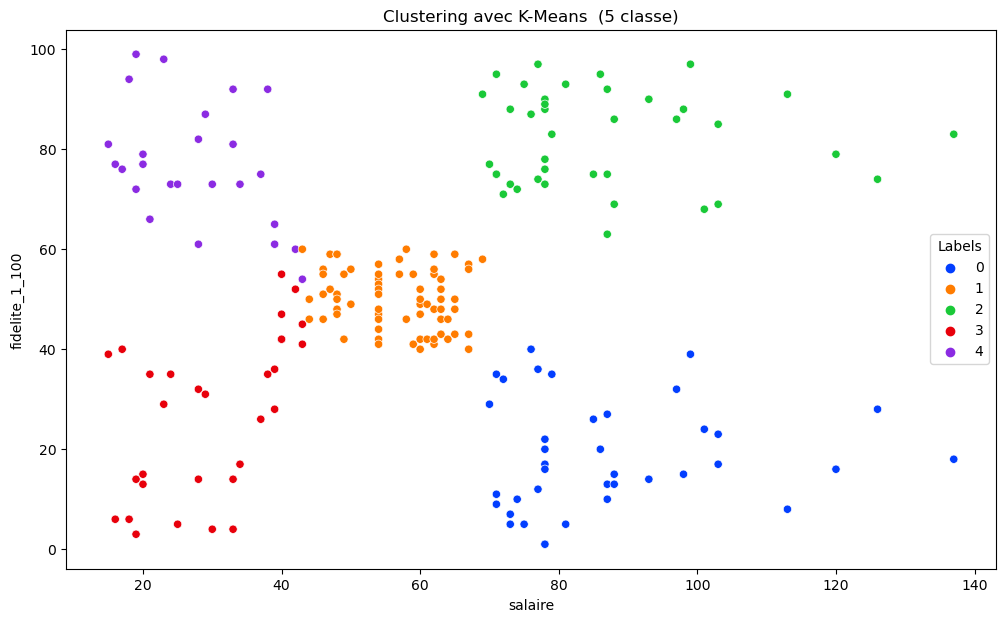

In [28]:
plt.figure(figsize=(12, 7))
sns.scatterplot(X['salaire'], X['fidelite_1_100'], hue=X['Labels'], 
                palette=sns.color_palette('bright', 5))
plt.title('Clustering avec K-Means  (5 classe)')
plt.show()

In [14]:
# x = X[['Age','salaire','fidelite_1_100']].values
# print(X[y_clusters == 0,0][1])
# print(X[y_clusters == 0,1][1])
# print(X[y_clusters == 0,2][1])

NameError: name 'x' is not defined

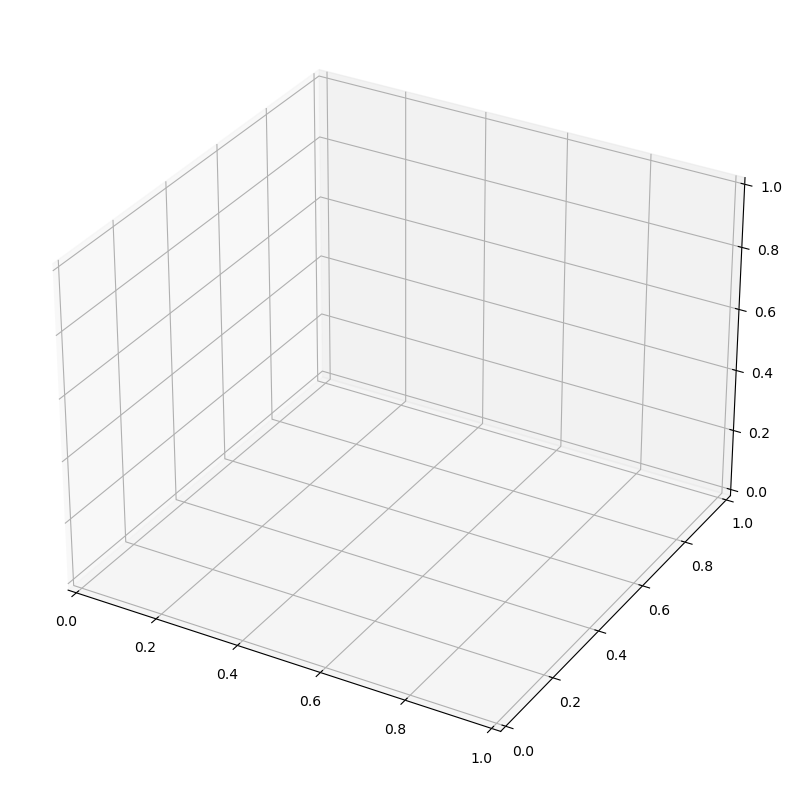

In [15]:
# y_clusters = model.fit_predict(x)
# y_clusters

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Anual Income-->')
ax.set_zlabel('Spending Score-->')
ax.legend()
plt.show()

 # HIERARCHICAL CLUSTERING

In [ ]:
H_clusters = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

In [ ]:
X['Labels_hierarch'] = H_clusters.labels_
X

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(X['salaire'], X['fidelite_1_100'], hue=X['Labels_hierarch'], 
                palette=sns.color_palette('bright', 5))
plt.title('Clustering Agglomerative (5 Classe) ')
plt.show()

In [ ]:
dist = distance_matrix(X, X)
print(dist)
Z = hierarchy.linkage(dist, 'complete')

In [ ]:
plt.figure(figsize=(30, 90))
cluster_dendrograms = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=20, orientation='left')

# DB-SCAN (pas encore compris)

In [ ]:
db_clusters = DBSCAN(eps=12, min_samples=5).fit(X)

In [ ]:
X_Labels = db_clusters.labels_
plt.figure(figsize=(10, 7))
sns.scatterplot(X['salaire'], X['fidelite_1_100'], hue=X_Labels, 
                palette=sns.color_palette('bright', np.unique(db_clusters.labels_).shape[0]))
plt.title('DB-SCAN Clusterint ( Epsilon = 12, Min. Samples = 5')
plt.show()

In [ ]:
# Utiliser la méthode elbow pour trouver le nombre optimal de clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('La méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# params = {
#             'kmt__n_clusters': [i for i in range(1,11)]  # two underscores
#             }

# kmeans = KMeans(n_clusters = 1, init = 'k-means++', random_state = 0)
# grid_kmt = GridSearchCV(param_grid=params, estimator=kmeans, cv = 3)

In [ ]:
# Construction du modèle
# from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Visualiser les résultats
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'magenta', label = 'Cluster 5')

# plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], c = 'pink', label = 'Cluster 6')

plt.title('Clusters de clients')
plt.xlabel('Age')
plt.ylabel('Salaire')
plt.legend();

In [ ]:
df = pd.read_csv("CC GENERAL.csv")

In [ ]:
df
